In [1]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

c:\Users\Lenovo\Desktop\Fernando\Ironhack\Environments\HugginFaceEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Lenovo\Desktop\Fernando\Ironhack\Environments\HugginFaceEnv\lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Lenovo\.cache\huggingface\hub\models--timm--resnet50.a1_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer M

In [5]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---------------------------------- ----- 6.6/7.5 MB 36.6 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 29.0 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 26.9 MB/s eta 0:00:00
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)


In [44]:
from PIL import Image
image = Image.open("C:/Users/Lenovo/Pictures/Random Images/city2.jpg")

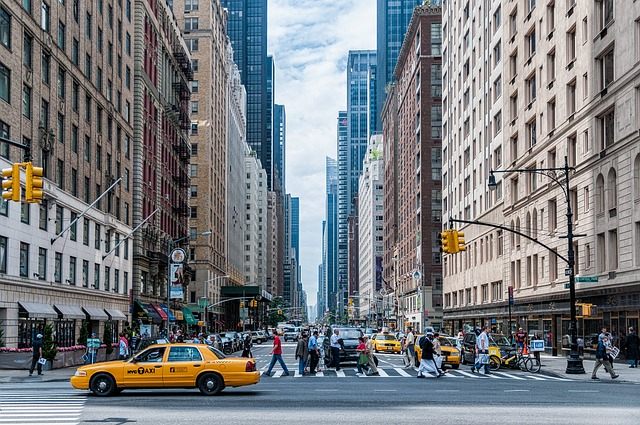

In [45]:
image

In [46]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)

# you can specify the revision tag if you don't want the timm dependency
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )


Detected person with confidence 0.969 at location [308.7, 329.45, 322.91, 374.58]
Detected person with confidence 0.994 at location [475.77, 325.89, 493.2, 374.98]
Detected traffic light with confidence 0.993 at location [23.33, 162.92, 43.78, 203.98]
Detected person with confidence 0.906 at location [403.47, 327.96, 417.06, 364.97]
Detected car with confidence 0.975 at location [249.35, 330.43, 270.0, 344.15]
Detected traffic light with confidence 0.981 at location [1.23, 163.77, 19.42, 202.77]
Detected person with confidence 0.97 at location [297.51, 329.56, 311.73, 375.16]
Detected person with confidence 0.994 at location [592.1, 328.34, 619.66, 379.71]
Detected car with confidence 0.932 at location [281.99, 327.95, 299.95, 341.83]
Detected car with confidence 0.974 at location [473.0, 335.91, 517.53, 368.87]
Detected truck with confidence 0.901 at location [327.33, 327.65, 364.48, 367.13]
Detected person with confidence 0.997 at location [263.97, 329.09, 288.45, 377.34]
Detected pe

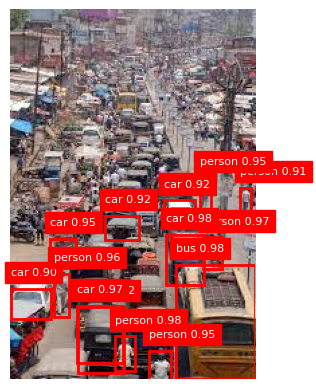

In [37]:
# Sample object detection data
detections = [
    {"label": "car", "confidence": 0.904, "location": [0.06, 208.05, 30.03, 230.57]},
    {"label": "person", "confidence": 0.977, "location": [78.14, 243.67, 93.17, 269.72]},
    {"label": "bus", "confidence": 0.978, "location": [123.44, 190.04, 182.8, 275.36]},
    {"label": "person", "confidence": 0.905, "location": [171.44, 132.87, 179.17, 154.09]},
    {"label": "truck", "confidence": 0.922, "location": [50.07, 221.51, 84.93, 271.25]},
    {"label": "person", "confidence": 0.971, "location": [143.91, 169.73, 158.13, 193.66]},
    {"label": "car", "confidence": 0.949, "location": [29.68, 171.1, 48.9, 192.26]},
    {"label": "person", "confidence": 0.951, "location": [141.09, 125.36, 149.4, 151.73]},
    {"label": "car", "confidence": 0.973, "location": [49.17, 220.83, 83.64, 263.79]},
    {"label": "car", "confidence": 0.924, "location": [114.82, 142.12, 138.02, 156.09]},
    {"label": "person", "confidence": 0.957, "location": [32.13, 196.75, 43.92, 229.25]},
    {"label": "person", "confidence": 0.951, "location": [103.17, 254.75, 119.54, 276.03]},
    {"label": "car", "confidence": 0.916, "location": [70.63, 153.97, 95.9, 171.8]},
    {"label": "car", "confidence": 0.985, "location": [116.24, 168.14, 144.63, 205.03]},
]

# Create a plot
fig, ax = plt.subplots(1)
ax.imshow(image)

# Plot bounding boxes
for detection in detections:
    label = detection["label"]
    confidence = detection["confidence"]
    location = detection["location"]
    
    # Extract coordinates
    x_min, y_min, x_max, y_max = location
    
    # Calculate width and height of the bounding box
    width = x_max - x_min
    height = y_max - y_min
    
    # Create a rectangle patch
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
    
    # Add the patch to the Axes
    ax.add_patch(rect)
    
    # Add label and confidence with smaller text
    plt.text(x_min, y_min - 10, f"{label} {confidence:.2f}", color='white', fontsize=8, backgroundcolor='red')

# Show the plot
plt.axis('off')
plt.show()

### Clothes

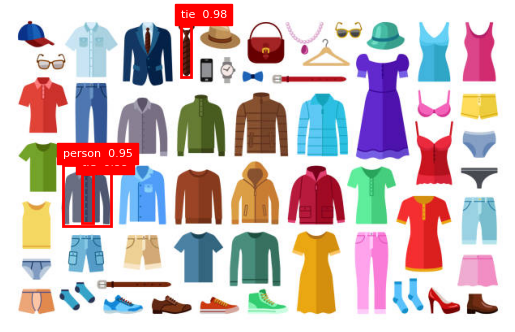

In [33]:
# Sample object detection data
detections = [
    {"label": "tie ", "confidence": 0.976, "location": [209.94, 13.02, 222.7, 76.4]},
    {"label": "tie ", "confidence": 0.991, "location": [88.04, 196.13, 102.44, 256.75]},
    {"label": "person ", "confidence": 0.951, "location": [64.32, 184.31, 124.02, 259.5]},
]

# Create a plot
fig, ax = plt.subplots(1)
ax.imshow(image)

# Plot bounding boxes
for detection in detections:
    label = detection["label"]
    confidence = detection["confidence"]
    location = detection["location"]
    
    # Extract coordinates
    x_min, y_min, x_max, y_max = location
    
    # Calculate width and height of the bounding box
    width = x_max - x_min
    height = y_max - y_min
    
    # Create a rectangle patch
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
    
    # Add the patch to the Axes
    ax.add_patch(rect)
    
    # Add label and confidence with smaller text
    plt.text(x_min, y_min - 10, f"{label} {confidence:.2f}", color='white', fontsize=8, backgroundcolor='red')

# Show the plot
plt.axis('off')
plt.show()

### New York City

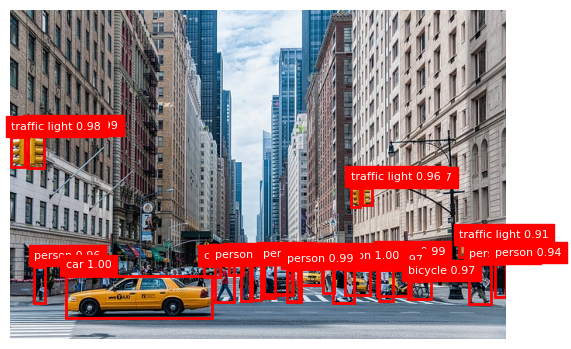

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Sample object detection data
detections = [
    {"label": "person", "confidence": 0.969, "location": [308.7, 329.45, 322.91, 374.58]},
    {"label": "person", "confidence": 0.994, "location": [475.77, 325.89, 493.2, 374.98]},
    {"label": "traffic light", "confidence": 0.993, "location": [23.33, 162.92, 43.78, 203.98]},
    {"label": "person", "confidence": 0.906, "location": [403.47, 327.96, 417.06, 364.97]},
    {"label": "car", "confidence": 0.975, "location": [249.35, 330.43, 270.0, 344.15]},
    {"label": "traffic light", "confidence": 0.981, "location": [1.23, 163.77, 19.42, 202.77]},
    {"label": "person", "confidence": 0.97, "location": [297.51, 329.56, 311.73, 375.16]},
    {"label": "person", "confidence": 0.994, "location": [592.1, 328.34, 619.66, 379.71]},
    {"label": "car", "confidence": 0.932, "location": [281.99, 327.95, 299.95, 341.83]},
    {"label": "car", "confidence": 0.974, "location": [473.0, 335.91, 517.53, 368.87]},
    {"label": "truck", "confidence": 0.901, "location": [327.33, 327.65, 364.48, 367.13]},
    {"label": "person", "confidence": 0.997, "location": [263.97, 329.09, 288.45, 377.34]},
    {"label": "person", "confidence": 0.927, "location": [357.52, 334.76, 372.81, 375.44]},
    {"label": "person", "confidence": 0.965, "location": [30.68, 331.04, 45.13, 377.75]},
    {"label": "car", "confidence": 0.958, "location": [326.58, 327.44, 362.98, 367.06]},
    {"label": "car", "confidence": 0.999, "location": [71.53, 342.99, 260.19, 396.89]},
    {"label": "traffic light", "confidence": 0.975, "location": [454.28, 230.0, 466.11, 251.38]},
    {"label": "traffic light", "confidence": 0.905, "location": [578.99, 303.76, 592.89, 319.33]},
    {"label": "car", "confidence": 0.969, "location": [432.16, 335.84, 464.46, 367.9]},
    {"label": "bicycle", "confidence": 0.97, "location": [513.08, 349.55, 543.14, 373.12]},
    {"label": "person", "confidence": 0.939, "location": [624.73, 327.21, 639.91, 369.93]},
    {"label": "car", "confidence": 0.986, "location": [370.8, 334.05, 402.19, 354.31]},
    {"label": "person", "confidence": 0.96, "location": [326.31, 328.33, 341.01, 371.68]},
    {"label": "person", "confidence": 0.998, "location": [416.84, 330.42, 443.21, 378.65]},
    {"label": "person", "confidence": 0.989, "location": [356.32, 335.06, 375.03, 376.28]},
    {"label": "traffic light", "confidence": 0.962, "location": [439.26, 229.04, 451.4, 254.27]},
]

# Create a plot
fig, ax = plt.subplots(1)
ax.imshow(image)

# Plot bounding boxes
for detection in detections:
    label = detection["label"]
    confidence = detection["confidence"]
    location = detection["location"]
    
    # Extract coordinates
    x_min, y_min, x_max, y_max = location
    
    # Calculate width and height of the bounding box
    width = x_max - x_min
    height = y_max - y_min
    
    # Create a rectangle patch
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
    
    # Add the patch to the Axes
    ax.add_patch(rect)
    
    # Add label and confidence with smaller text
    plt.text(x_min, y_min - 10, f"{label} {confidence:.2f}", color='white', fontsize=8, backgroundcolor='red')

# Show the plot
plt.axis('off')
plt.show()

In [32]:
!pip freeze

absl-py==2.1.0
aiohappyeyeballs @ file:///home/conda/feedstock_root/build_artifacts/aiohappyeyeballs_1723793936996/work
aiohttp @ file:///D:/bld/aiohttp_1723940768730/work
aiosignal @ file:///home/conda/feedstock_root/build_artifacts/aiosignal_1667935791922/work
appdirs==1.4.4
asttokens @ file:///home/conda/feedstock_root/build_artifacts/asttokens_1698341106958/work
astunparse==1.6.3
async-timeout @ file:///home/conda/feedstock_root/build_artifacts/async-timeout_1691763562544/work
attrs @ file:///home/conda/feedstock_root/build_artifacts/attrs_1722977137225/work
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
Bottleneck @ file:///C:/b/abs_f05kqh7yvj/croot/bottleneck_1707864273291/work
Brotli @ file:///D:/bld/brotli-split_1695989908365/work
cachetools==5.5.0
certifi @ file:///home/conda/feedstock_root/build_artifacts/certifi_1720457958366/work/certifi
cffi @ file:///D:/bld/cffi_1723018491042/work
charset-normalizer @ file:///home/conda/feedstock_